In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten, Dense, Concatenate, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import SGD, Adam, Adamax

sns.set()

In [2]:
df1 = pd.read_csv('train_full.csv')
df1.head()

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_33136/2533427703.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/harshbhatt/Desktop/Projects/Restaurant Recommendation/train_full.csv')


,customer_id,gender,status_x,verified_x,created_at_x,updated_at_x,location_number,location_type,latitude_x,longitude_x,...,country_id,city_id,created_at_y,updated_at_y,device_type,display_orders,location_number_obj,id_obj,CID X LOC_NUM X VENDOR,target
0,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,0,4,TCHWPBT X 0 X 4,0
1,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-03 12:32:06,2020-04-05 20:46:03,3,1,0,13,TCHWPBT X 0 X 13,0
2,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-04 22:28:22,2020-04-07 16:35:55,3,1,0,20,TCHWPBT X 0 X 20,0
3,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-06 19:20:48,2020-04-02 00:56:17,3,1,0,23,TCHWPBT X 0 X 23,0
4,TCHWPBT,Male,1,1,2018-02-07 19:16:23,2018-02-07 19:16:23,0,Work,-96.44,-67.2,...,1.0,1.0,2018-05-17 22:12:38,2020-04-05 15:57:41,3,1,0,28,TCHWPBT X 0 X 28,0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802400 entries, 0 to 5802399
Data columns (total 73 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   customer_id             object 
 1   gender                  object 
 2   status_x                int64  
 3   verified_x              int64  
 4   created_at_x            object 
 5   updated_at_x            object 
 6   location_number         int64  
 7   location_type           object 
 8   latitude_x              float64
 9   longitude_x             float64
 10  id                      int64  
 11  authentication_id       float64
 12  latitude_y              float64
 13  longitude_y             float64
 14  vendor_category_en      object 
 15  vendor_category_id      float64
 16  delivery_charge         float64
 17  serving_distance        float64
 18  is_open                 float64
 19  OpeningTime             object 
 20  OpeningTime2            object 
 21  prepration_time         int64  

Instead of 72 columns we can use a few features that are heuristically more relevant than others:
- gender
- location type
- language
- opening time
- city_id
- vendor rating

<Axes: >

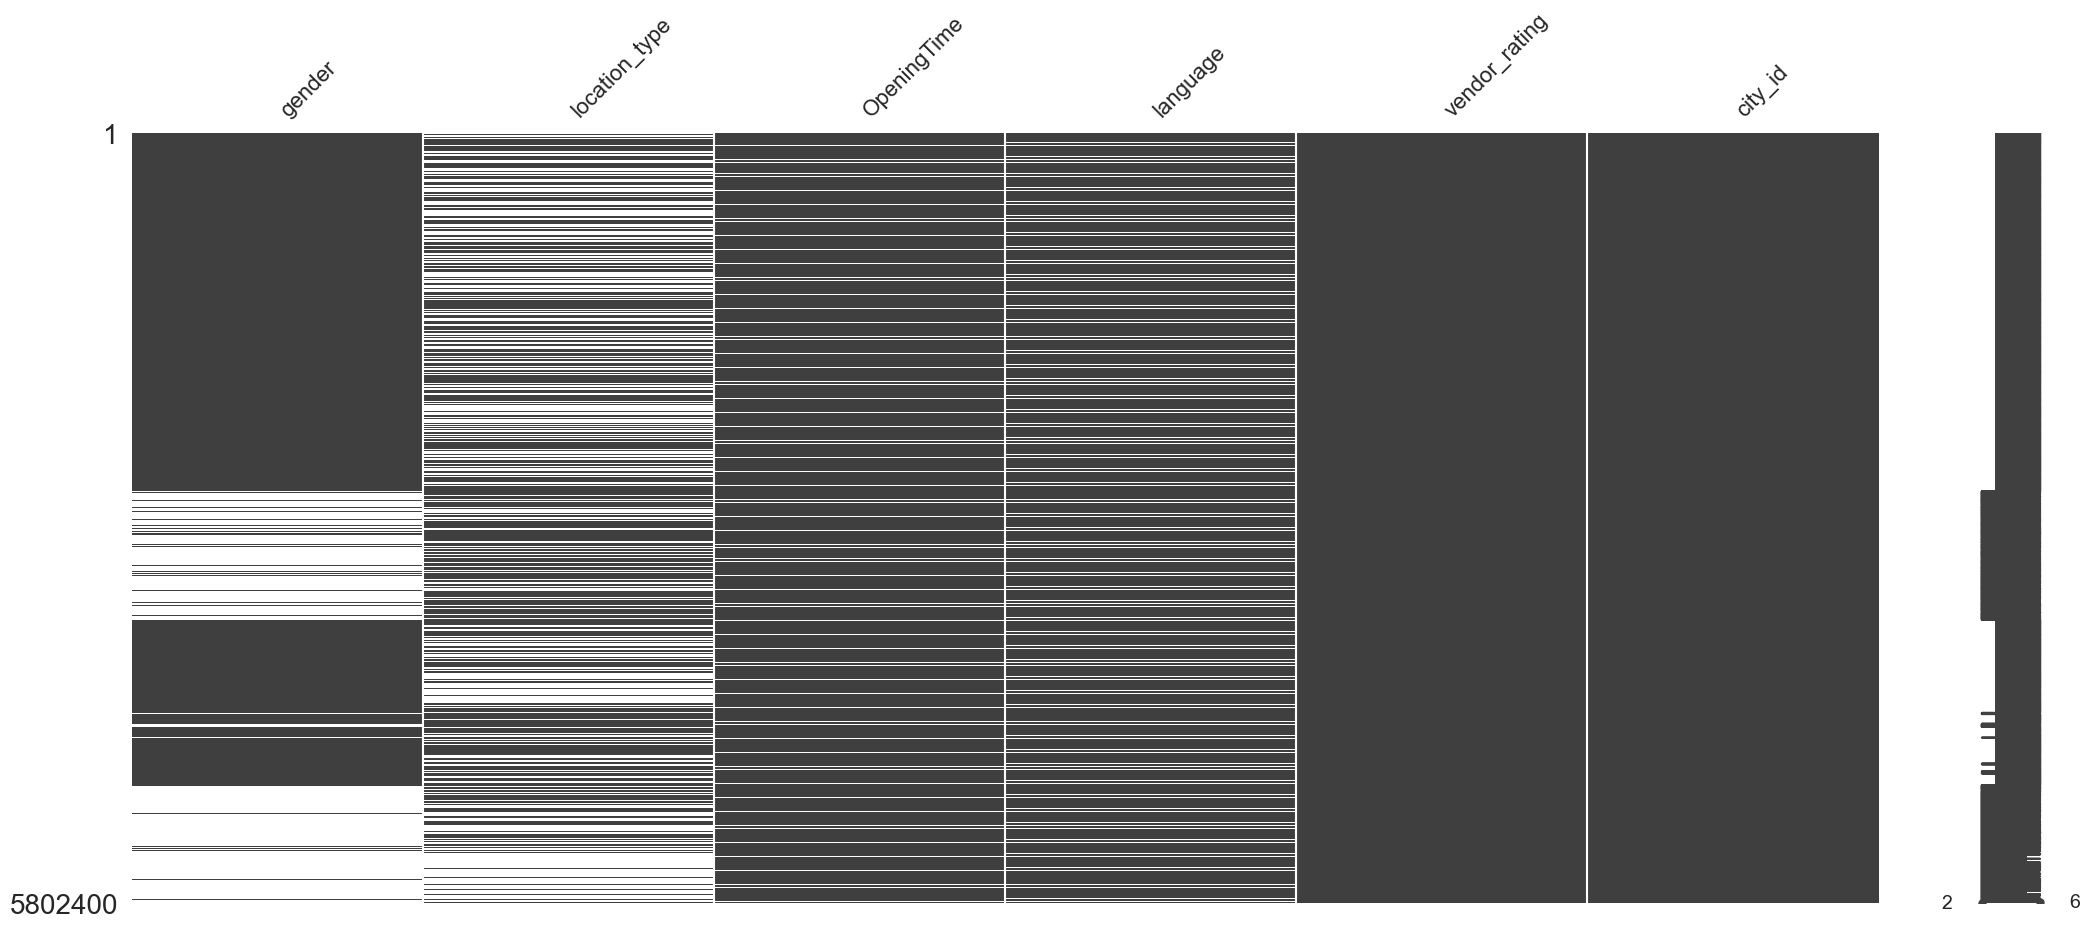

In [4]:
main_df = df1[['gender', 'location_type', 'OpeningTime', 'language', 'vendor_rating', 'city_id']]
msno.matrix(main_df)

gender
Male      3789100
Female     308200
Name: count, dtype: int64
null values: 1705100
% of null values:  0.2938611608989384


<Axes: xlabel='gender', ylabel='count'>

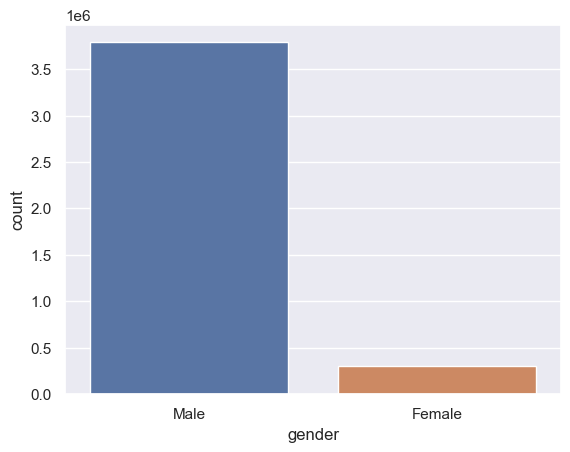

In [5]:
#Gender

print(main_df['gender'].value_counts())

gender_null = main_df['gender'].isnull().sum()
print('null values:', gender_null)

print("% of null values: ", gender_null / len(main_df['gender']))
#29% data is null

sns.countplot(main_df, x = 'gender')

location_type
Home     1921700
Work      627400
Other     599100
Name: count, dtype: int64
null values: 2654200
% of null values:  0.45743140769336826


<Axes: xlabel='location_type', ylabel='count'>

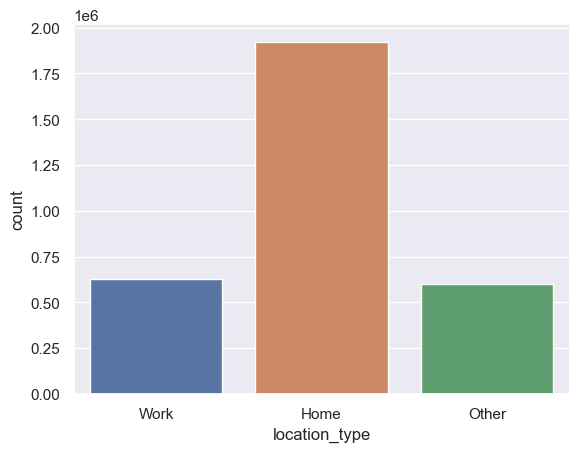

In [6]:
#location type
print(main_df['location_type'].value_counts())

lt_null = main_df['location_type'].isnull().sum()
print('null values:', lt_null)

print("% of null values: ", lt_null / len(main_df['location_type']))
#45% data is null

sns.countplot(main_df, x = 'location_type')

In [7]:
#language
print(main_df['language'].value_counts())

lang_null = main_df['language'].isnull().sum()
print('null values:', lang_null)

print("% of null values: ", lang_null / len(main_df['language']))
#15% data is null

language
EN    4932040
Name: count, dtype: int64
null values: 870360
% of null values:  0.15


In [8]:
#Opening time
ot_null = main_df['OpeningTime'].isnull().sum()
print('null values:', lang_null)

print("% of null values: ", ot_null / len(main_df['OpeningTime']))
#9% data is null

null values: 870360
% of null values:  0.09


vendor_rating
4.5    1102456
4.3    1044432
4.2     870360
4.4     812336
4.6     580240
4.7     406168
4.0     348144
4.1     290120
3.8     116048
4.8     116048
3.2      58024
3.7      58024
Name: count, dtype: int64
null values: 0
% of null values:  0.0


<Axes: xlabel='vendor_rating', ylabel='count'>

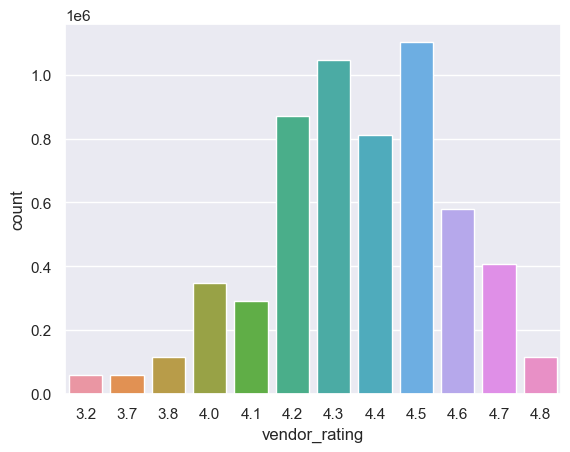

In [9]:
#vendor rating = average rating
print(main_df['vendor_rating'].value_counts())

vr_null = main_df['vendor_rating'].isnull().sum()
print('null values:', vr_null)

print("% of null values: ", vr_null / len(main_df['vendor_rating']))
#0% data is null

sns.countplot(main_df, x = 'vendor_rating')

In [10]:
df2 = pd.read_csv('orders.csv')
df2.head()

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_33136/3736370614.py:1: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Users/harshbhatt/Desktop/Projects/Restaurant Recommendation/orders.csv')


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      128378 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      4305 non-null    object 
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  65880 non-null   float64
 8   is_favorite                     100108 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   45220 non-null   float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

vendor_rating
0.0    25175
5.0    14212
4.0     2748
3.0     1426
1.0     1029
2.0      630
Name: count, dtype: int64
null values: 90083
% of null values:  0.6657871591908531


<Axes: xlabel='vendor_rating', ylabel='count'>

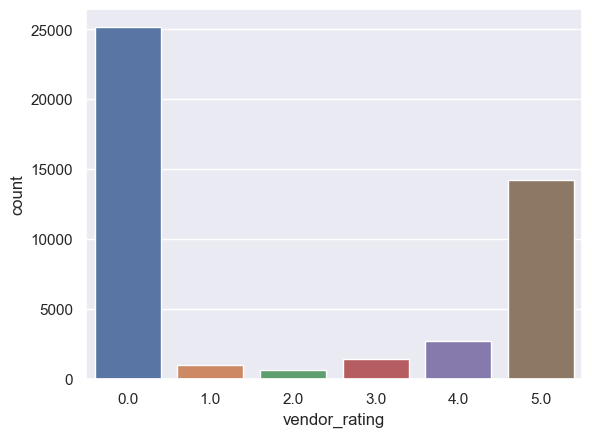

In [12]:
#vendor rating
print(df2['vendor_rating'].value_counts())

vr2_null = df2['vendor_rating'].isnull().sum()
print('null values:', vr2_null)

print("% of null values: ", vr2_null / len(df2['vendor_rating']))
#66% data is null

sns.countplot(df2, x = 'vendor_rating')

vendor_id
113    7807
105    5562
79     5117
84     5001
78     4643
       ... 
304     562
271     559
196     512
250     503
295     474
Name: count, Length: 100, dtype: int64
null values: 0
% of null values:  0.0


<Axes: xlabel='vendor_id', ylabel='count'>

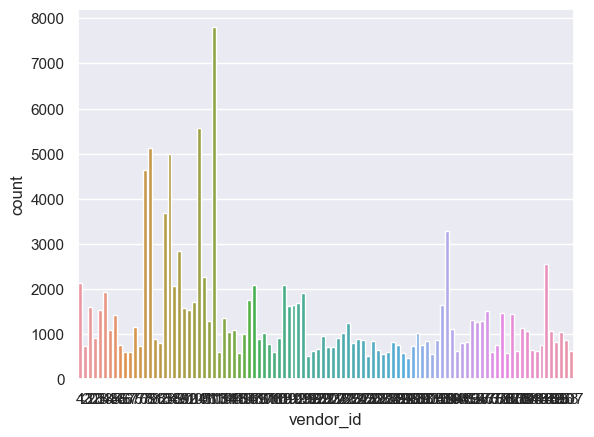

In [13]:
print(df2['vendor_id'].value_counts())

vi_null = df2['vendor_id'].isnull().sum()
print('null values:', vi_null)

print("% of null values: ", vi_null / len(df2['vendor_id']))
#0% data is null

sns.countplot(df2, x = 'vendor_id')

In [14]:
print(df2['customer_id'].value_counts())

ci_null = df2['customer_id'].isnull().sum()
print('null values:', ci_null)

print("% of null values: ", ci_null / len(df2['customer_id']))
#0% data is null

customer_id
XW90EAP    262
TL7Z2DM    151
VDEJEMP    146
HJFTTGW    128
B28LJKM    119
          ... 
B6DEG8Q      1
FP47TR0      1
NIIOLY3      1
1WM7MLN      1
QDXLWM7      1
Name: count, Length: 27445, dtype: int64
null values: 0
% of null values:  0.0


Merging the datasets

We need other features such as vendor tags, delivery distance and delivery fee for informational and output purposes

In [15]:
data1 = df1[['customer_id', 'id'] + list(main_df.columns.values) + ['vendor_tag_name', 'delivery_charge', 'serving_distance']].copy()
data1.rename(columns = {'vendor_rating': 'mean_rating'}, inplace = True)

In [16]:
data1.head()

,customer_id,id,gender,location_type,OpeningTime,language,mean_rating,city_id,vendor_tag_name,delivery_charge,serving_distance
0,TCHWPBT,4,Male,Work,11:00AM-11:30PM,EN,4.4,1.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",0.0,6.0
1,TCHWPBT,13,Male,Work,08:30AM-10:30PM,EN,4.7,1.0,"Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",0.7,5.0
2,TCHWPBT,20,Male,Work,08:00AM-10:45PM,EN,4.5,1.0,"Breakfast,Desserts,Free Delivery,Indian",0.0,8.0
3,TCHWPBT,23,Male,Work,10:59AM-10:30PM,EN,4.5,1.0,"Burgers,Desserts,Fries,Salads",0.0,5.0
4,TCHWPBT,28,Male,Work,11:00AM-11:45PM,EN,4.4,1.0,Burgers,0.7,15.0


We can find duplicate entries of customer-vendor pair by creating a unique identifier using both

In [17]:
cols = ['customer_id', 'id']
data1['cust_vendor'] = data1[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data1.head()

,customer_id,id,gender,location_type,OpeningTime,language,mean_rating,city_id,vendor_tag_name,delivery_charge,serving_distance,cust_vendor
0,TCHWPBT,4,Male,Work,11:00AM-11:30PM,EN,4.4,1.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",0.0,6.0,TCHWPBT_4
1,TCHWPBT,13,Male,Work,08:30AM-10:30PM,EN,4.7,1.0,"Breakfast,Cakes,Crepes,Italian,Pasta,Pizzas,Sa...",0.7,5.0,TCHWPBT_13
2,TCHWPBT,20,Male,Work,08:00AM-10:45PM,EN,4.5,1.0,"Breakfast,Desserts,Free Delivery,Indian",0.0,8.0,TCHWPBT_20
3,TCHWPBT,23,Male,Work,10:59AM-10:30PM,EN,4.5,1.0,"Burgers,Desserts,Fries,Salads",0.0,5.0,TCHWPBT_23
4,TCHWPBT,28,Male,Work,11:00AM-11:45PM,EN,4.4,1.0,Burgers,0.7,15.0,TCHWPBT_28


In [18]:
data1.drop_duplicates(['cust_vendor'], inplace = True)

In [19]:
data2 = df2[['akeed_order_id','customer_id','vendor_id', 'item_count', 'grand_total', 'vendor_rating']][:]
data2.rename(columns = {"vendor_id": "id"}, inplace = True)

# Make derived variables 'all' with id and customer_id columns
cols = ['customer_id', 'id']
data2['cust_vendor'] = data2[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

data2.head()

,akeed_order_id,customer_id,id,item_count,grand_total,vendor_rating,cust_vendor
0,163238.0,92PEE24,105,1.0,7.6,NaN,92PEE24_105
1,163240.0,QS68UD8,294,1.0,8.7,NaN,QS68UD8_294
2,163241.0,MB7VY5F,83,2.0,14.4,NaN,MB7VY5F_83
3,163244.0,KDJ951Y,90,1.0,7.1,NaN,KDJ951Y_90
4,163245.0,BAL0RVT,83,4.0,27.2,NaN,BAL0RVT_83


In [20]:
df = pd.merge(data1, data2, on = 'cust_vendor', how = 'inner')
df.head()

,customer_id_x,id_x,gender,location_type,OpeningTime,language,mean_rating,city_id,vendor_tag_name,delivery_charge,serving_distance,cust_vendor,akeed_order_id,customer_id_y,id_y,item_count,grand_total,vendor_rating
0,TCHWPBT,113,Male,Work,10:59AM-10:59PM,EN,4.7,1.0,"Arabic,Desserts,Free Delivery,Indian",0.0,15.0,TCHWPBT_113,200434.0,TCHWPBT,113,NaN,7.9,5.0
1,TCHWPBT,237,Male,Work,08:30PM-11:59PM,EN,4.6,1.0,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",0.7,15.0,TCHWPBT_237,170654.0,TCHWPBT,237,1.0,5.4,NaN
2,ZGFSYCZ,4,Male,Home,11:00AM-11:30PM,EN,4.4,1.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",0.0,6.0,ZGFSYCZ_4,11439.0,ZGFSYCZ,4,NaN,23.6,NaN
3,ZGFSYCZ,28,Male,Home,11:00AM-11:45PM,EN,4.4,1.0,Burgers,0.7,15.0,ZGFSYCZ_28,171022.0,ZGFSYCZ,28,3.0,7.9,NaN
4,ZGFSYCZ,28,Male,Home,11:00AM-11:45PM,EN,4.4,1.0,Burgers,0.7,15.0,ZGFSYCZ_28,151462.0,ZGFSYCZ,28,2.0,7.3,NaN


In [21]:
#dropping redundant columns
df.rename(columns = {"customer_id_x": "customer_id"}, inplace = True)
df.rename(columns = {"id_x": "vendor_id"}, inplace = True)
df.drop(['customer_id_y','id_y'],axis=1,inplace=True)
df.head()

,customer_id,vendor_id,gender,location_type,OpeningTime,language,mean_rating,city_id,vendor_tag_name,delivery_charge,serving_distance,cust_vendor,akeed_order_id,item_count,grand_total,vendor_rating
0,TCHWPBT,113,Male,Work,10:59AM-10:59PM,EN,4.7,1.0,"Arabic,Desserts,Free Delivery,Indian",0.0,15.0,TCHWPBT_113,200434.0,NaN,7.9,5.0
1,TCHWPBT,237,Male,Work,08:30PM-11:59PM,EN,4.6,1.0,"American,Burgers,Desserts,Donuts,Fries,Pasta,S...",0.7,15.0,TCHWPBT_237,170654.0,1.0,5.4,NaN
2,ZGFSYCZ,4,Male,Home,11:00AM-11:30PM,EN,4.4,1.0,"Arabic,Breakfast,Burgers,Desserts,Free Deliver...",0.0,6.0,ZGFSYCZ_4,11439.0,NaN,23.6,NaN
3,ZGFSYCZ,28,Male,Home,11:00AM-11:45PM,EN,4.4,1.0,Burgers,0.7,15.0,ZGFSYCZ_28,171022.0,3.0,7.9,NaN
4,ZGFSYCZ,28,Male,Home,11:00AM-11:45PM,EN,4.4,1.0,Burgers,0.7,15.0,ZGFSYCZ_28,151462.0,2.0,7.3,NaN


In [22]:
for col in ['vendor_rating', 'serving_distance', 'delivery_charge']:
    print(col, df[col].isnull().sum() / len(df[col]))

vendor_rating 0.6661591947101729
serving_distance 0.0
delivery_charge 0.0


In [23]:
df.drop(columns = ['language'], inplace = True)

In [24]:
len(df)

132027

In [25]:
df.dropna(subset = 'gender', inplace = True)
len(df)

104549

In [26]:
sex = pd.get_dummies(df['gender'], columns = ['gender'], prefix = 'sex', drop_first = True)
df = pd.concat([df, sex], axis = 1)
df.drop(columns = ['gender'], inplace = True)

In [27]:
df.rename(columns = {'vendor_rating': 'rating'}, inplace = True)

# Collaborative Filtering

In [28]:
ratings = df[['customer_id', 'vendor_id', 'rating']]
ratings.head()

,customer_id,vendor_id,rating
0,TCHWPBT,113,5.0
1,TCHWPBT,237,NaN
2,ZGFSYCZ,4,NaN
3,ZGFSYCZ,28,NaN
4,ZGFSYCZ,28,NaN


In [30]:
# Calculate mean rating by only valid ratings(except missing and rated zero)
ratings_not_none = []

for i in range(0, ratings.shape[0]-1) :
  if pd.isnull(ratings.iloc[i][2]) == False and ratings.iloc[i][2] != 0 :
    ratings_not_none.append(ratings.iloc[i][2])
    
valid_rating_mean = np.mean(np.array(ratings_not_none))

In [31]:
def rating_missing_func(x) :
  if pd.isnull(x) == True :
    return valid_rating_mean
  elif x == 0 :
    return valid_rating_mean
  else :
    return x

ratings["rating2"] = ratings["rating"].apply(rating_missing_func)
ratings

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_33136/4207723963.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings["rating2"] = ratings["rating"].apply(rating_missing_func)


,customer_id,vendor_id,rating,rating2
0,TCHWPBT,113,5.0,5.000000
1,TCHWPBT,237,NaN,4.435256
2,ZGFSYCZ,4,NaN,4.435256
3,ZGFSYCZ,28,NaN,4.435256
4,ZGFSYCZ,28,NaN,4.435256
...,...,...,...,...
131959,U2OTA4O,573,NaN,4.435256
132015,Z7RQ368,160,5.0,5.000000
132016,WIIU12E,573,NaN,4.435256
132025,LE63M0S,84,NaN,4.435256


In [33]:
ratings_new = ratings[['customer_id', 'vendor_id', 'rating2']]
ratings_new.rename(columns = {'rating2':'rating'}, inplace = True)
ratings_new.head()

/var/folders/x6/npt_81hx5z118fvsw6w6qh900000gn/T/ipykernel_33136/2840661076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_new.rename(columns = {'rating2':'rating'}, inplace = True)


,customer_id,vendor_id,rating
0,TCHWPBT,113,5.000000
1,TCHWPBT,237,4.435256
2,ZGFSYCZ,4,4.435256
3,ZGFSYCZ,28,4.435256
4,ZGFSYCZ,28,4.435256


In [39]:
df_ratings = ratings_new.groupby(['customer_id', 'vendor_id']).mean().reset_index()

In [43]:
temp_df = df_ratings.pivot(index = 'customer_id', columns = 'vendor_id', values = 'rating').fillna(0)
temp_df

vendor_id,4,13,20,23,28,33,43,44,55,66,...,681,841,843,845,846,849,855,856,858,907
customer_id,,,,,,,,,,,,,,,,,,,,,
000THBA,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005ECL6,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009UFS1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00F8I3F,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00FQ1U9,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZP7JCZ,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZZV76GY,0.0,0.0,0.0,0.000000,4.435256,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZZVLIB5,0.0,0.0,0.0,4.435256,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
customer_id_index = []

for i, id_ in enumerate(temp_df.T):
    customer_id_index.append([id_, i])

In [52]:
df_cust_id_idx = pd.DataFrame(customer_id_index)
df_cust_id_idx.rename(columns = {0:'customer_id', 1: 'customer_index'}, inplace = True)
df_cust_id_idx

,customer_id,customer_index
0,000THBA,0
1,005ECL6,1
2,009UFS1,2
3,00F8I3F,3
4,00FQ1U9,4
...,...,...
18545,ZZP7JCZ,18545
18546,ZZV76GY,18546
18547,ZZVLIB5,18547
18548,ZZWKMGG,18548


In [48]:
vendor_id_index = []

for i, id_ in enumerate(temp_df):
    vendor_id_index.append([id_,i])

In [49]:
df_vendor_id_idx = pd.DataFrame(vendor_id_index)
df_vendor_id_idx.rename(columns = {0:'vendor_id', 1: 'vendor_index'}, inplace = True)
df_vendor_id_idx

,vendor_id,vendor_index
0,4,0
1,13,1
2,20,2
3,23,3
4,28,4
...,...,...
95,849,95
96,855,96
97,856,97
98,858,98


In [56]:
ratings_with_index = pd.merge(df_ratings, df_cust_id_idx, on = 'customer_id')
ratings_with_index = pd.merge(ratings_with_index, df_vendor_id_idx, on = 'vendor_id')
ratings_with_index

,customer_id,vendor_id,rating,customer_index,vendor_index
0,000THBA,148,4.435256,0,31
1,019ILOE,148,4.435256,16,31
2,02Y4HXJ,148,4.397408,36,31
3,03E01HL,148,4.500000,45,31
4,03FKIZR,148,4.435256,46,31
...,...,...,...,...,...
54139,ZANQ79S,855,4.435256,18142,96
54140,ZE3UWNG,855,4.548205,18203,96
54141,ZIAQ6O5,855,4.435256,18270,96
54142,ZQSVJ87,855,4.435256,18395,96


In [84]:
ratings = ratings_with_index[['customer_index', 'vendor_index', 'rating']].astype(int)
ratings.rename(columns={'customer_id_num':'customer_idx', 'vendor_id_num':'vendor_idx', 'rating':'rating'}, inplace=True)
ratings

,customer_index,vendor_index,rating
0,0,31,4
1,16,31,4
2,36,31,4
3,45,31,4
4,46,31,4
...,...,...,...
54139,18142,96,4
54140,18203,96,4
54141,18270,96,4
54142,18395,96,4


In [85]:
rating_full_matrix_by_index_with_nan = ratings.pivot(index='customer_index', columns='vendor_index', values='rating')

In [59]:
# Making Full Matrix(Sparse Matrix)
rating_full_matrix_by_index = ratings.pivot(index='customer_index', columns='vendor_index', values='rating').fillna(0)
rating_full_matrix_by_index

vendor_index,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
customer_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18546,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18547,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Building MF model

In [64]:
#number of latent features
k = 100

#total mean
m = ratings['rating'].mean()

#number of customers
c = ratings['customer_index'].unique().shape[0]

#number of vendors
v = ratings['vendor_index'].unique().shape[0]

In [72]:
# def RMSE(y_true, y_pred):
#     return tf.sqrt(tf.reduce_mean(tf.square(y_true, y_pred)))

In [65]:
#Embedding
customer = Input(shape = (1,))
vendor = Input(shape = (1,))
C_embed = Embedding(c, k, embeddings_regularizer = l2())(customer)
V_embed = Embedding(v, k, embeddings_regularizer = l2())(vendor)
C_bias = Embedding(c, 1, embeddings_regularizer = l2())(customer)
V_bias = Embedding(v, 1, embeddings_regularizer = l2())(vendor)

C_embed = Flatten()(C_embed)
V_embed = Flatten()(V_embed)
C_bias = Flatten()(C_bias)
V_bias = Flatten()(V_bias)

l = Concatenate()([C_embed, V_embed, C_bias, V_bias])

In [66]:
l = Dense(2048)(l)
l = Activation('linear')(l)
l = Dense(256)(l)
l = Activation('linear')(l)
l = Dense(1)(l)

In [79]:
model = Model(inputs = [customer, vendor], outputs = l)
model.compile(loss = 'mse',optimizer = Adamax(),metrics = [tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       1855000     ['input_3[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       10000       ['input_4[0][0]']                
                                                                                            

In [80]:
result = model.fit(
  x = [ratings['customer_index'].values, ratings['vendor_index'].values],
  y = ratings['rating'].values - m,
  epochs = 10,
  batch_size = 512,
  validation_data = (
    [ratings['customer_index'].values, ratings['vendor_index'].values],
    ratings['rating'].values - m)
)

Epoch 1/10
106/106 [==============================] - 2s 18ms/step - loss: 2.6310 - root_mean_squared_error: 0.4218 - val_loss: 0.2087 - val_root_mean_squared_error: 0.4189
Epoch 2/10
106/106 [==============================] - 2s 17ms/step - loss: 0.1861 - root_mean_squared_error: 0.4158 - val_loss: 0.1622 - val_root_mean_squared_error: 0.3926
Epoch 3/10
106/106 [==============================] - 2s 17ms/step - loss: 0.1659 - root_mean_squared_error: 0.3971 - val_loss: 0.1468 - val_root_mean_squared_error: 0.3724
Epoch 4/10
106/106 [==============================] - 2s 17ms/step - loss: 0.1537 - root_mean_squared_error: 0.3808 - val_loss: 0.1379 - val_root_mean_squared_error: 0.3588
Epoch 5/10
106/106 [==============================] - 2s 18ms/step - loss: 0.1477 - root_mean_squared_error: 0.3719 - val_loss: 0.1354 - val_root_mean_squared_error: 0.3547
Epoch 6/10
106/106 [==============================] - 2s 18ms/step - loss: 0.1439 - root_mean_squared_error: 0.3663 - val_loss: 0.1282 

In [82]:
customer_ids = ratings['customer_index'].values[0:6]
vendor_ids = ratings['vendor_index'].values[0:6]
predictions = model.predict([customer_ids, vendor_ids]) + m
print("Actuals: \n", ratings[0:6])
print()
print("Predictions: \n", predictions)

1/1 [==============================] - 0s 57ms/step
Actuals: 
    customer_index  vendor_index  rating
0               0            31       4
1              16            31       4
2              36            31       4
3              45            31       4
4              46            31       4
5             120            31       4

Predictions: 
 [[3.935418 ]
 [4.0958066]
 [4.0051785]
 [3.8115573]
 [3.961733 ]
 [4.006703 ]]


In [107]:
def recom_vendor(customer_idx, n_items):
    # Vendors rated by inputted customer
    customer_vendor = rating_full_matrix_by_index_with_nan.loc[customer_idx].copy()
    
    for vendor in rating_full_matrix_by_index_with_nan:
        # Excepton vendors which already rated by inputted customer
        if pd.notnull(customer_vendor.loc[vendor]):
            customer_vendor.loc[vendor] = 0
        # Calculate predicted rating about vendors which is not rated by inputted customer
        else:
            customer_vendor.loc[vendor] = round(min(model.predict([np.array([customer_idx]), np.array([vendor])])[0][0] + m, 5), 3)
    
    # Sort vendors by predictted rating
    vendor_sort = customer_vendor.sort_values(ascending=False)[:n_items]   
    df_vendor_sort = pd.DataFrame(vendor_sort)    
    df_vendor_sort.rename(columns={'vendor_index':'vendor_index', customer_idx:'predicted_rating'}, inplace=True)

    return df_vendor_sort

In [108]:
customer_id_idx = ratings_with_index[['customer_id', 'customer_index']]
customer_id_idx = customer_id_idx.drop_duplicates()

In [109]:
vendor_id_idx = ratings_with_index[['vendor_id', 'vendor_index']]
vendor_id_idx = vendor_id_idx.drop_duplicates()

In [110]:
mf_df = df[['vendor_id', 'mean_rating', 'vendor_tag_name']]
mf_df = mf_df.drop_duplicates()

In [115]:
def mf_dl_recom_vendor_list(customer_id, n_items) :
  df_specified_customer = customer_id_idx[customer_id_idx['customer_id'] == customer_id]
  specified_customer_idx = df_specified_customer.iloc[0][1]
  mf_recom_list_temp = recom_vendor(customer_idx = specified_customer_idx, n_items = n_items)
  mf_recom_list_temp2 = pd.merge(mf_recom_list_temp, vendor_id_idx, how='inner', on='vendor_index')
  mf_recom_list_temp3 = mf_recom_list_temp2[['vendor_id', 'predicted_rating']]
  
  mf_recom_list = pd.merge(mf_recom_list_temp3, mf_df, how='inner', on='vendor_id')

  return mf_recom_list

In [116]:
mf_dl_recom_vendor_list(customer_id = 'ZZV76GY', n_items = 5)

1/1 [==============================] - 0s 11ms/step


,vendor_id,predicted_rating,mean_rating,vendor_tag_name
0,310,4.174,4.8,"Bagels,Desserts,Salads"
1,679,4.171,4.5,"Biryani,Desserts,Indian,Kebabs,Rice"
2,216,4.162,4.7,"Coffee,Organic"
3,86,4.161,4.5,"Cakes,Crepes,Desserts,Donuts,Fresh Juices,Ice ..."
4,115,4.158,4.8,"Desserts,Free Delivery,Healthy Food,Sweets"
